# Reproducing Figure 3
Case studies 3 and 4 also discuss cases
where the continuum limit is inaccurate.
Figure 3 in the paper summarises these cases,
and we reproduce this figure below. First,
we load in the packages we will need.

In [1]:
using StepwiseEQL
using CairoMakie
using EpithelialDynamics1D
using OrdinaryDiffEq
using LinearSolve
using Random
using StatsBase

The part of the figure involving the third case study is produced
below.

In [2]:
# Case study 3
fig = Figure(fontsize=41)
final_time = 75.0
domain_length = 30.0
midpoint = domain_length / 2
initial_condition = [LinRange(0, 5, 30); LinRange(25, 30, 30)] |> unique!
damping_constant = 1.0
resting_spring_length = 0.2
spring_constant = 1 / 5
k = spring_constant
force_law_parameters = (s=resting_spring_length, k=spring_constant)
force_law = (δ, p) -> p.k * (p.s - δ)
Δt = 1e-2
K = 15.0
β = 1e-2
G = (δ, p) -> max(zero(δ), p.β * p.K * (one(δ) - inv(p.K * δ)))
Gp = (β=β, K=K)
prob = CellProblem(;
    final_time,
    initial_condition,
    damping_constant,
    force_law,
    force_law_parameters,
    proliferation_law=G,
    proliferation_period=Δt,
    proliferation_law_parameters=Gp)
ens_prob = EnsembleProblem(prob)
Random.seed!(123)
times = [0.0, 1.0, 10.0, 25.0, 40.0, 75.0]
esol = solve(ens_prob, Tsit5(), EnsembleSerial(); trajectories=1000, saveat=times)
(; q, r, means, lowers, uppers, knots) = node_densities(esol)
fvm_prob = continuum_limit(prob, 2500, proliferation=true)
fvm_sol = solve(fvm_prob, TRBDF2(linsolve=KLUFactorization()), saveat=esol[1].t)
fig = Figure(fontsize=33)
ax = Axis(fig[1, 1],xlabel=L"x",ylabel=L"q(x, t)",
    title=L"(a):$ $ Case study 3",titlealign=:left,
    width=1200,height=300,
    xticks=(0:10:30, [L"%$s" for s in 0:10:30]),
    yticks=(0:5:20, [L"%$s" for s in 0:5:20]))
colors = (:black, :red, :blue, :green, :orange, :purple)
all_lines = []
for i in eachindex(esol[1])
    line = lines!(ax, knots[i], means[i], color=colors[i], linewidth=5)
    push!(all_lines, line)
    lines!(ax, fvm_prob.geometry.mesh_points, fvm_sol.u[i], color=colors[i], linestyle=:dash, linewidth=8)
end
arrows!(ax, [15.0], [5.0], [0.0], [7.5], color=:black, linewidth=12, arrowsize=50)
text!(ax, [15.5], [7.0], text=L"t", color=:black, fontsize=47)
resize_to_layout!(fig)
tightlimits!(ax)
ylims!(ax, 0, 20)
resize_to_layout!(fig);

The part of the figure involving the third case study is produced
below.

In [3]:
# Case study 4
final_time = 250.0
domain_length = 30.0
midpoint = domain_length / 2
initial_condition = [LinRange(0, 5, 30);] |> unique!
damping_constant = 1.0
resting_spring_length = 0.2
spring_constant = 1 / 5
k = spring_constant
force_law_parameters = (s=resting_spring_length, k=spring_constant)
force_law = (δ, p) -> p.k * (p.s - δ)
Δt = 1e-2
K = 15.0
β = 0.15
G = (δ, p) -> max(zero(δ), p.β * (one(δ) - inv(p.K * δ)))
Gp = (β=β, K=K)
prob = CellProblem(;
    final_time,
    initial_condition,
    damping_constant,
    force_law,
    force_law_parameters,
    proliferation_law=G,
    proliferation_period=Δt,
    proliferation_law_parameters=Gp,
    fix_right=false)
ens_prob = EnsembleProblem(prob)
times = [0, 5, 25, 50, 100, 250]
Random.seed!(123)
esol = solve(ens_prob, Tsit5(); trajectories=1000, saveat=times)
pde = continuum_limit(prob, 2500, proliferation=true)
pde_sol = solve(pde, TRBDF2(linsolve=KLUFactorization()), saveat=esol[1].t)
(; q, r, means, lowers, uppers, knots) = node_densities(esol, stat=mean, extrapolate=true)
colors = (:black, :red, :blue, :green, :orange, :purple)
time_indices = [findlast(≤(τ), esol[1].t) for τ in times]
ax21 = Axis(fig[2, 1], xlabel=L"x", ylabel=L"q(x, t)",
    title=L"(b):$ $ Case study 4", titlealign=:left,
    width=1200, height=300, halign=:left,
    xticks=(0:2:10, [L"%$s" for s in 0:2:10]),
    yticks=(0:5:20, [L"%$s" for s in 0:5:20]))
arrows!(ax21, [5.0], [3.0], [3.0], [0.0], color=:black, linewidth=12, arrowsize=50)
text!(ax21, [7.0], [3.5], text=L"t", fontsize=47)
@views for (j, i) in enumerate(time_indices)
    lines!(ax21, knots[i], means[i], color=colors[j], linewidth=5)
    lines!(ax21, pde.geometry.mesh_points * pde_sol.u[i][end], pde_sol.u[i][begin:(end-1)], color=colors[j], linestyle=:dash, linewidth=8)
end
tightlimits!(ax21)
xlims!(ax21, 0, 10)
ylims!(ax21, 0, 20.0)
resize_to_layout!(fig);

With all this, we finally obtain the figure.

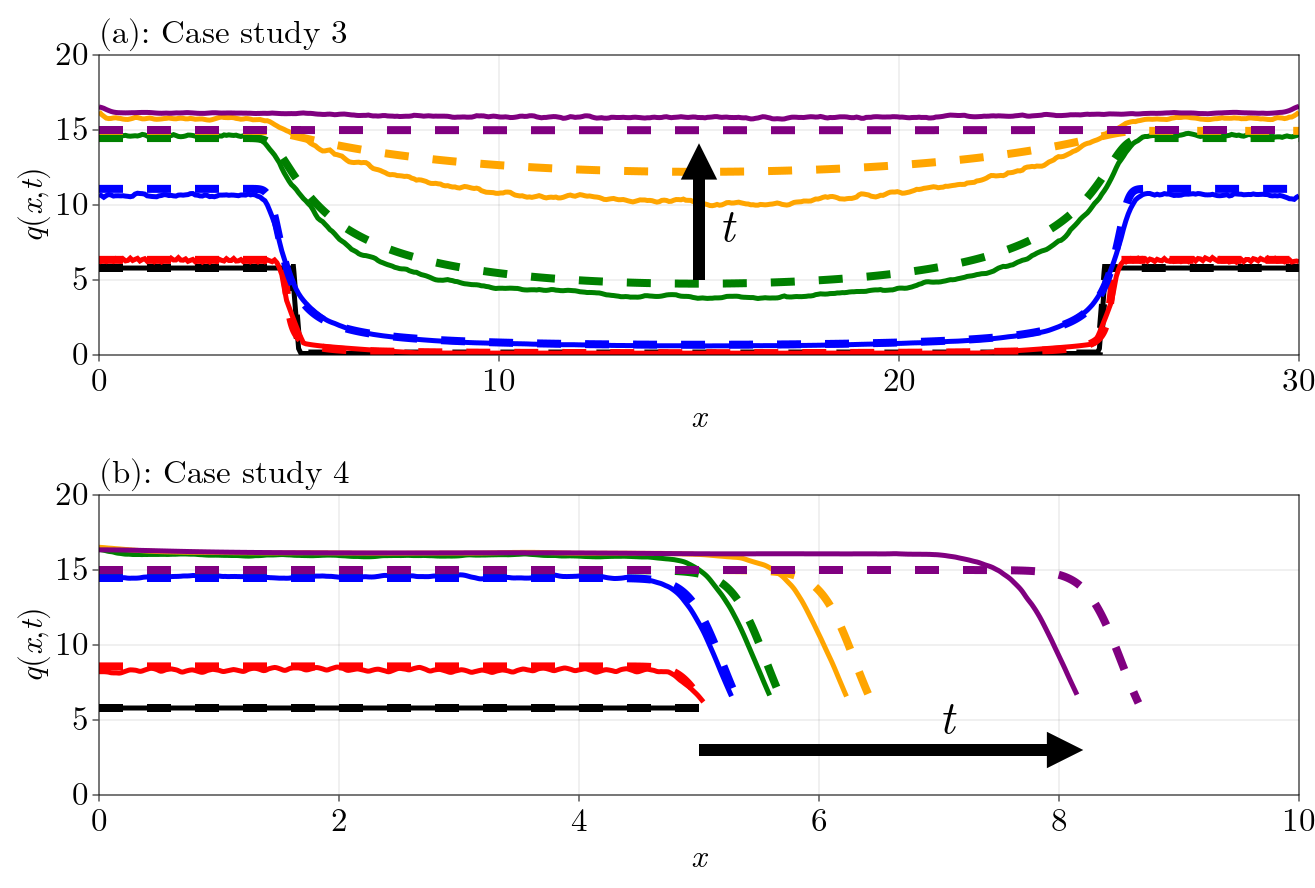

In [4]:
fig

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*